In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
maximum = 20

In [3]:
class k_armed_bandit:
    def __init__(self, k):
        self.k = k
        self.p = [(random.uniform(0, maximum), 1) for i in range(k)]
    
    def show_dist(self):
        print(self.p)
    
    def play(self, idx):
        return random.gauss(*self.p[idx])

In [4]:
k = 10
m = k_armed_bandit(k)
m.play(0)

18.60094320254572

# Action-value Methods

$$
\begin{aligned}
Q(A) &= \frac{\text{sum of rewards when a take prior to t}}{\text{number of times a take prior to t}} \\
&= \frac{\sum_{i = 1}^{t-1} R_i \cdot 1_{A_i = a}} {\sum^{t-1}_{i=1} 1_{A_i = a}}
\end{aligned}
$$

## update rules

$$
Q_{n+1}(A) = Q_n + \frac{1}{n}[R_n - Q_n]
$$

In [5]:
m.show_dist()

[(17.67927420488226, 1), (15.16072343124698, 1), (10.952347696992435, 1), (14.032827536453707, 1), (9.164369365090062, 1), (4.3030277293552714, 1), (11.548309137476867, 1), (6.842199178225106, 1), (16.97687866919505, 1), (7.156066528571882, 1)]


# random selection and estimation

In [6]:
def random_estimation(epochs):
    q_list = [0] * k
    reward_list = []
    for i in range(epochs):
        t = i + 1
        idx = random.randint(0, k - 1)
        reward = m.play(idx)
        reward_list.append(reward)
        q_list[idx] = q_list[idx] + (reward - q_list[idx]) / t
    return q_list, reward_list

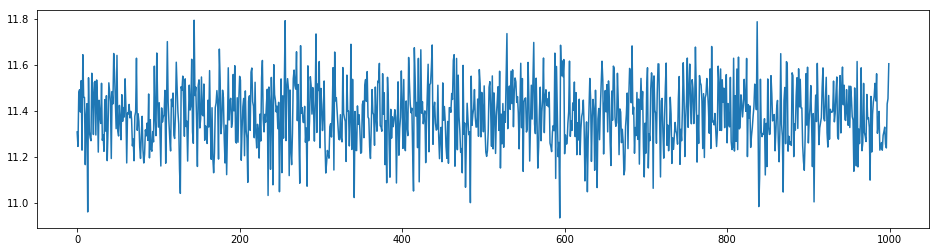

In [7]:
epochs, num_experiments = 1000, 1000
r = np.array([random_estimation(epochs)[1] for i in range(num_experiments)])
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r.shape[1]), r.mean(axis=0))

# greedy estimation

In [8]:
def greedy_estimation(epochs, optimistic=False):
    if optimistic:
        q_list = [maximum + 1] * k
    else:
        q_list = [0] * k
    reward_list = []
    for e in range(epochs):
        t = e + 1
        max_value = max(q_list)
        idx = random.choice([idx for idx, x in enumerate(q_list) if x == max_value])
        reward = m.play(idx)
        reward_list.append(reward)
        q_list[idx] = q_list[idx] + (reward - q_list[idx]) / t
    return q_list, reward_list

In [9]:
q, r = greedy_estimation(1000)
q

[0, 0, 0, 0, 9.129544559865074, 0, 0, 0, 0, 0]

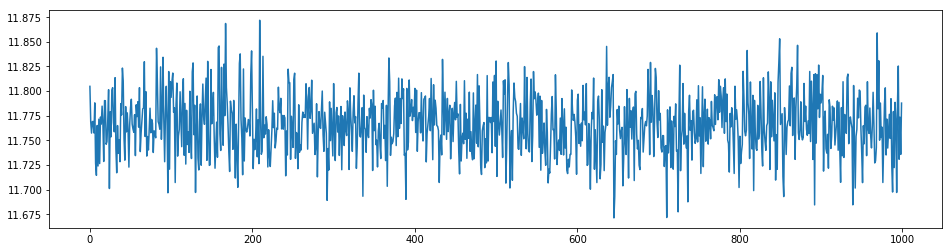

In [10]:
epochs, num_experiments = 1000, 1000
r = np.array([greedy_estimation(epochs)[1] for i in range(num_experiments)])
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r.shape[1]), r.mean(axis=0))

# epsilon-greedy estimation

In [11]:
def epsilon_greedy_estimation(epochs, epsilon, optimistic=False):
    if optimistic:
        q_list = [maximum + 1] * k
    else:
        q_list = [0] * k
    reward_list = []
    for e in range(epochs):
        t = e + 1
        if random.uniform(0, 1) > epsilon:
            max_value = max(q_list)
            idx = random.choice([idx for idx, x in enumerate(q_list) if x == max_value])
        else:
            idx = random.randint(0, k - 1)
        reward = m.play(idx)
        reward_list.append(reward)
        q_list[idx] = q_list[idx] + (reward - q_list[idx]) / t
    return q_list, reward_list

In [12]:
q, r = epsilon_greedy_estimation(1000, 0.1)
q

[0.8705973219576105,
 0.2691057799084149,
 0.3527217314946453,
 0.6885396455017853,
 0.4329859944722591,
 4.283313012494727,
 0.6109812125369423,
 0.17948308393370713,
 0.3996402500893425,
 0.15676121391150385]

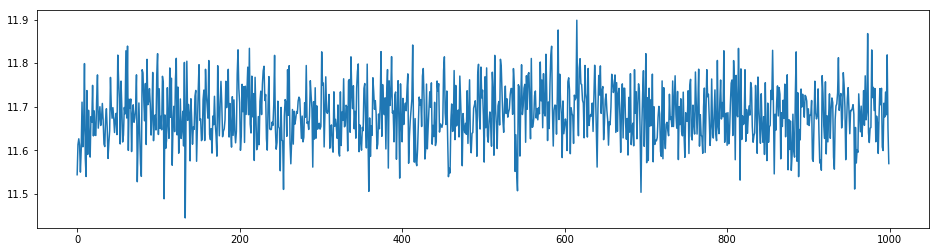

In [13]:
epochs, num_experiments = 1000, 1000
r = np.array([epsilon_greedy_estimation(epochs, 0.1)[1] for i in range(num_experiments)])
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r.shape[1]), r.mean(axis=0))

# comparsion

In [14]:
epochs, num_experiments = 200, 4000
x_list = np.arange(epochs)

In [15]:
# r_random = np.array([random_estimation(epochs)[1] for i in range(num_experiments)]).mean(axis=0)
r_greedy = np.array([greedy_estimation(epochs)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy = np.array([epsilon_greedy_estimation(epochs, 0.1)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy2 = np.array([epsilon_greedy_estimation(epochs, 0.01)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy3 = np.array([epsilon_greedy_estimation(epochs, 0.5)[1] for i in range(num_experiments)]).mean(axis=0)

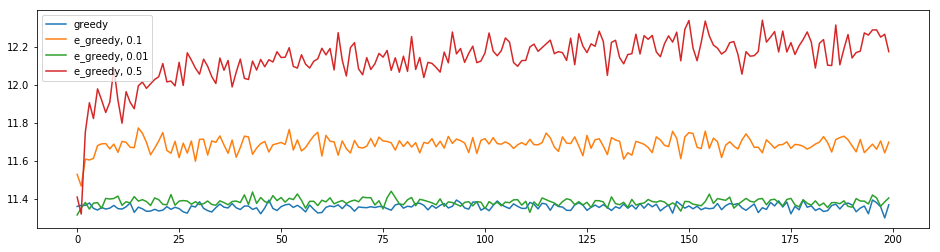

In [16]:
plt.figure(figsize=(16, 4))
# plt.plot(x_list, r_random, label='random')
plt.plot(x_list, r_greedy, label='greedy')
plt.plot(x_list, r_e_greedy, label='e_greedy, 0.1')
plt.plot(x_list, r_e_greedy2, label='e_greedy, 0.01')
plt.plot(x_list, r_e_greedy3, label='e_greedy, 0.5')
plt.legend()

In [21]:
r_greedy_op = np.array([greedy_estimation(epochs, True)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy_op = np.array([epsilon_greedy_estimation(epochs, 0.1, True)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy2_op = np.array([epsilon_greedy_estimation(epochs, 0.01, True)[1] for i in range(num_experiments)]).mean(axis=0)
r_e_greedy3_op = np.array([epsilon_greedy_estimation(epochs, 0.5, True)[1] for i in range(num_experiments)]).mean(axis=0)

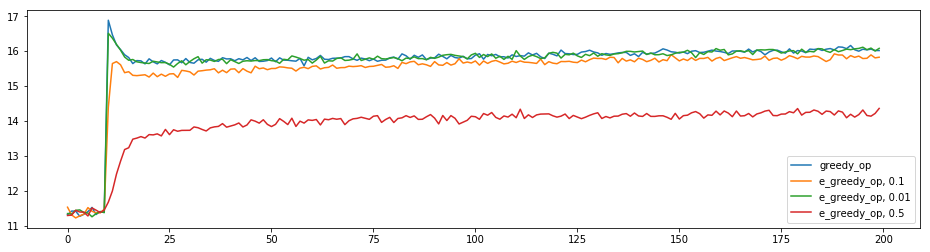

In [24]:
plt.figure(figsize=(16, 4))
# plt.plot(x_list, r_random, label='random')
plt.plot(x_list, r_greedy_op, label='greedy_op')
plt.plot(x_list, r_e_greedy_op, label='e_greedy_op, 0.1')
plt.plot(x_list, r_e_greedy2_op, label='e_greedy_op, 0.01')
plt.plot(x_list, r_e_greedy3_op, label='e_greedy_op, 0.5')
plt.legend()